In [1]:
#Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("C:\\Users\\acer\\Downloads\\site_526320230721144817.xlsx")

In [3]:
#!pip install openpyxl

In [4]:
df.head()


,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Xylene,MP-Xylene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-01-2020 00:00,02-01-2020 00:00,220.35,277.67,57.70,18.42,76.12,14.62,NaN,2.08,...,5.90,86.40,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0
1,02-01-2020 00:00,03-01-2020 00:00,215.33,263.63,71.02,22.54,87.65,14.62,NaN,2.10,...,12.05,88.17,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0
2,03-01-2020 00:00,04-01-2020 00:00,148.86,189.98,66.15,18.09,82.47,14.62,NaN,1.68,...,4.96,86.69,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0
3,04-01-2020 00:00,05-01-2020 00:00,74.78,104.55,80.72,15.12,95.84,14.62,NaN,1.04,...,13.40,94.54,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0
4,05-01-2020 00:00,06-01-2020 00:00,77.99,98.73,64.77,15.86,80.64,14.62,NaN,0.95,...,8.55,90.87,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0


In [5]:
df.shape

(1264, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   From Date    1264 non-null   object 
 1   To Date      1264 non-null   object 
 2   PM2.5        1264 non-null   float64
 3   PM10         1264 non-null   float64
 4   NO           1264 non-null   float64
 5   NO2          1264 non-null   float64
 6   NOx          1264 non-null   float64
 7   NH3          1195 non-null   float64
 8   SO2          1025 non-null   float64
 9   CO           1264 non-null   float64
 10  Ozone        1254 non-null   float64
 11  Benzene      1264 non-null   float64
 12  Toluene      1264 non-null   float64
 13  Eth-Benzene  1173 non-null   float64
 14  Xylene       1181 non-null   float64
 15  MP-Xylene    1264 non-null   float64
 16  RH           1264 non-null   float64
 17  WS           1264 non-null   float64
 18  WD           1231 non-null   float64
 19  SR    

<Axes: >

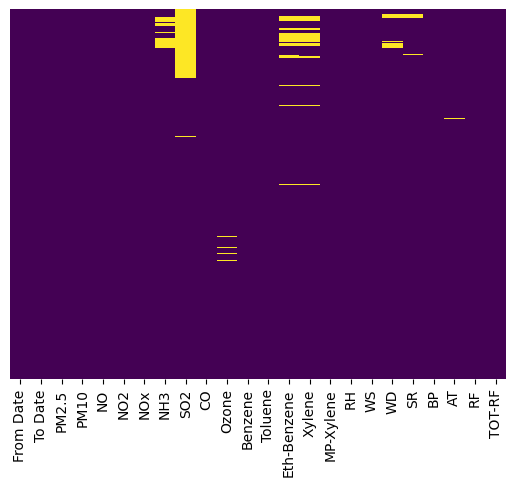

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [8]:
df.isnull().sum()

From Date        0
To Date          0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3             69
SO2            239
CO               0
Ozone           10
Benzene          0
Toluene          0
Eth-Benzene     91
Xylene          83
MP-Xylene        0
RH               0
WS               0
WD              33
SR              15
BP               0
AT               2
RF               0
TOT-RF           0
dtype: int64

In [9]:
nullvalues=df.isnull().sum().sort_values(ascending=False)

In [10]:
nullvalues

SO2            239
Eth-Benzene     91
Xylene          83
NH3             69
WD              33
SR              15
Ozone           10
AT               2
From Date        0
RF               0
BP               0
WS               0
RH               0
MP-Xylene        0
Toluene          0
To Date          0
Benzene          0
CO               0
NOx              0
NO2              0
NO               0
PM10             0
PM2.5            0
TOT-RF           0
dtype: int64

In [11]:
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [12]:
null_values_percentage

SO2            18.908228
Eth-Benzene     7.199367
Xylene          6.566456
NH3             5.458861
WD              2.610759
SR              1.186709
Ozone           0.791139
AT              0.158228
From Date       0.000000
RF              0.000000
BP              0.000000
WS              0.000000
RH              0.000000
MP-Xylene       0.000000
Toluene         0.000000
To Date         0.000000
Benzene         0.000000
CO              0.000000
NOx             0.000000
NO2             0.000000
NO              0.000000
PM10            0.000000
PM2.5           0.000000
TOT-RF          0.000000
dtype: float64

In [13]:
missing_data_with_percentage=pd.concat([nullvalues,null_values_percentage],axis=1,keys=["total","percent"])
#concatenating total null values and their percentage of missing values for further imputation or column deletion

In [14]:
missing_data_with_percentage

,total,percent
SO2,239,18.908228
Eth-Benzene,91,7.199367
Xylene,83,6.566456
NH3,69,5.458861
WD,33,2.610759
SR,15,1.186709
Ozone,10,0.791139
AT,2,0.158228
From Date,0,0.000000
RF,0,0.000000


In [15]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,Xylene,MP-Xylene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
count,1264.000000,1264.000000,1264.000000,1264.000000,1264.000000,1195.000000,1025.000000,1264.000000,1254.000000,1264.000000,...,1181.000000,1264.000000,1264.000000,1264.000000,1231.000000,1249.000000,1264.000000,1262.000000,1264.000000,1264.000000
mean,79.608758,180.418623,29.079976,28.052809,42.515372,16.625247,10.766400,1.187959,43.405829,2.070625,...,1.902227,72.093378,0.526100,163.262239,167.942486,752.664716,0.933790,25.898669,0.014541,1.277848
std,61.929634,129.834905,50.071270,26.394393,54.765803,15.821084,12.481647,0.995593,26.110141,1.968368,...,2.824105,16.803176,0.405687,62.650272,70.996828,6.047734,1.941232,6.258422,0.089802,6.742358
min,6.550000,2.150000,0.120000,0.760000,0.070000,0.920000,1.420000,0.160000,0.640000,0.000000,...,0.010000,14.390000,0.070000,13.220000,7.750000,710.900000,0.000000,9.300000,0.000000,0.000000
25%,37.210000,83.800000,3.827500,11.782500,9.707500,7.515000,6.470000,0.580000,24.935000,0.857500,...,0.450000,64.210000,0.230000,98.627500,122.615000,750.360000,0.120000,20.922500,0.000000,0.000000
50%,63.080000,144.320000,8.745000,17.660000,20.485000,10.630000,7.950000,0.920000,36.435000,1.580000,...,0.920000,75.675000,0.390000,162.935000,164.040000,753.960000,0.340000,28.105000,0.000000,0.000000
75%,99.255000,242.955000,22.975000,36.287500,47.447500,18.760000,11.310000,1.400000,56.942500,2.652500,...,2.190000,83.937500,0.730000,219.070000,210.835000,754.530000,1.040000,30.400000,0.000000,0.000000
max,613.170000,741.210000,258.400000,187.860000,266.420000,101.400000,116.820000,6.820000,194.960000,12.880000,...,34.710000,99.380000,2.850000,285.000000,880.000000,859.370000,33.360000,39.550000,2.240000,114.200000


In [16]:
df.nunique()
#these are all unique value present in the dataframe

From Date      1264
To Date        1264
PM2.5          1205
PM10           1246
NO              997
NO2            1092
NOx            1151
NH3             774
SO2             710
CO              282
Ozone          1142
Benzene         478
Toluene         720
Eth-Benzene     261
Xylene          434
MP-Xylene      1114
RH              173
WS             1211
WD             1182
SR              462
BP              314
AT              922
RF               38
TOT-RF           75
dtype: int64

In [17]:
df.drop(["From Date"],axis=1,inplace=True)
df.drop(["To Date"],axis=1,inplace=True)
df.drop(["SO2"],axis=1,inplace=True)   

In [18]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,Ozone,Benzene,Toluene,...,Xylene,MP-Xylene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,220.35,277.67,57.70,18.42,76.12,14.62,2.08,19.30,5.33,0.46,...,5.90,86.40,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0
1,215.33,263.63,71.02,22.54,87.65,14.62,2.10,16.88,11.50,0.93,...,12.05,88.17,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0
2,148.86,189.98,66.15,18.09,82.47,14.62,1.68,24.05,4.11,0.37,...,4.96,86.69,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0
3,74.78,104.55,80.72,15.12,95.84,14.62,1.04,10.48,5.89,0.89,...,13.40,94.54,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0
4,77.99,98.73,64.77,15.86,80.64,14.62,0.95,24.76,4.81,0.56,...,8.55,90.87,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0


# Calulating Air Quality Index Based On Formula
The air quality index is a piece wise linear function of the pollutants concentration.To convert from concentration to AQI followiung formula is used.

Indian equation for AQI:

Ip = [IHi – ILo / BPHi – BPLo] (Cp – BPLo) + ILo

Where,

Ip = index of pollutant p Cp = truncated concentration of pollutant p BPHi = concentration breakpoint i.e. greater than or equal to Cp BPLo = concentration breakpoint i.e. less than or equal to Cp IHi = AQI value corresponding to BPHi ILo = AQI value corresponding to BPLo

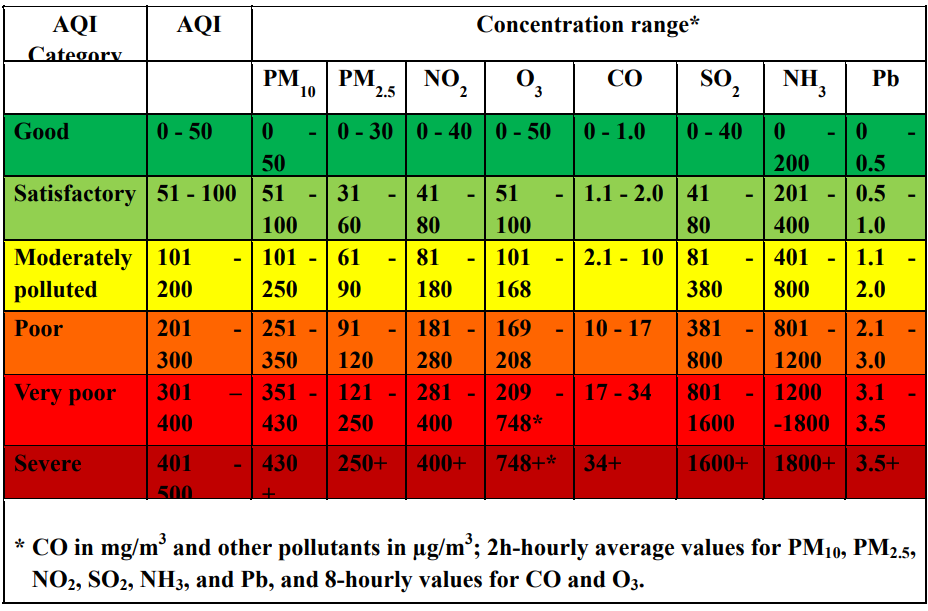

--The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.

--For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.

--For CO and O3 the maximum value in last 8-hrs is used.

--Each measure is converted into a Sub-Index based on pre-defined groups.

--Sometimes measures are not available due to lack of measuring or lack of required data points.

--Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [19]:
#Calculating the individual pollutant index for no2
def get_NO2_subindex(x):
    if (x<=40):
        return x*(50/40)
    elif x<=80:
        return 50+(x-40)*(50/40)
    elif x<=180:
        return 100+(x-80)*(100/100)
    elif x<=280:
        return 200+(x-180)*(100/100)
    elif x<=400:
        return 300+(x-280)*(100/120)
    elif (x>400):
        return 400+(x-400)*(100/120)
    else:
        return 0
df["NO2_Subindex"]=df["NO2"].apply(lambda x: get_NO2_subindex(x))


In [20]:
# PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].apply(lambda x: get_PM25_subindex(x))

In [21]:
# PM10 Sub-Index calculation

def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10"].apply(lambda x: get_PM10_subindex(x))

In [22]:
# NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].apply(lambda x: get_NOx_subindex(x))

# AQI Calculation

AQI

The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

In [23]:
df["AQI_calculated"] = round(df[["PM10_SubIndex","PM2.5_SubIndex","NO2_Subindex"
                                  ,"NOx_SubIndex"]].max(axis = 1))

In [24]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,Ozone,Benzene,Toluene,...,SR,BP,AT,RF,TOT-RF,NO2_Subindex,PM2.5_SubIndex,PM10_SubIndex,NOx_SubIndex,AQI_calculated
0,220.35,277.67,57.70,18.42,76.12,14.62,2.08,19.30,5.33,0.46,...,755.61,3.10,14.28,0.0,0.0,23.0250,377.192308,227.670000,95.15,377.0
1,215.33,263.63,71.02,22.54,87.65,14.62,2.10,16.88,11.50,0.93,...,755.62,6.71,15.00,0.0,0.0,28.1750,373.330769,213.630000,107.65,373.0
2,148.86,189.98,66.15,18.09,82.47,14.62,1.68,24.05,4.11,0.37,...,755.62,2.51,16.39,0.0,0.0,22.6125,322.200000,159.986667,102.47,322.0
3,74.78,104.55,80.72,15.12,95.84,14.62,1.04,10.48,5.89,0.89,...,755.62,8.38,14.36,0.0,0.0,18.9000,149.266667,103.033333,115.84,149.0
4,77.99,98.73,64.77,15.86,80.64,14.62,0.95,24.76,4.81,0.56,...,755.61,5.67,14.05,0.0,0.0,19.8250,159.966667,98.730000,100.64,160.0


In [25]:
#df.isnull().sum()

In [26]:
df1=df.iloc [:,13:21]

In [27]:
df1.head()

,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0
1,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0
2,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0
3,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0
4,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0


In [28]:
df1['AQI']=df["AQI_calculated"]

In [29]:
df1.head()

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
0,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0,377.0
1,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0,373.0
2,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0,322.0
3,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0,149.0
4,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0,160.0


In [30]:
df1.isnull().sum()

RH         0
WS         0
WD        33
SR        15
BP         0
AT         2
RF         0
TOT-RF     0
AQI        0
dtype: int64

In [31]:
nullvalues1=df1.isnull().sum().sort_values(ascending=False)

In [32]:
nullvalues1

WD        33
SR        15
AT         2
RH         0
WS         0
BP         0
RF         0
TOT-RF     0
AQI        0
dtype: int64

In [33]:
df1.iloc[:,:]=df1.fillna(df.median())

<Axes: >

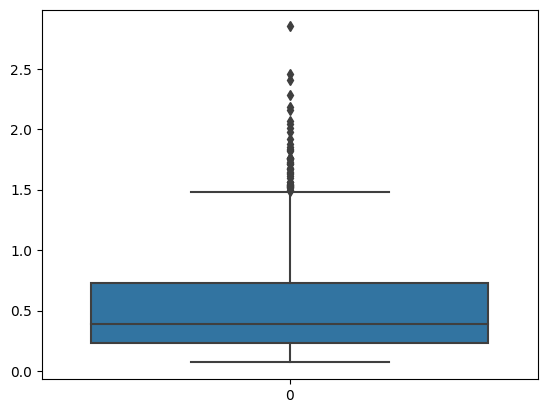

In [34]:
sns.boxplot(df1["RH"])


C:\Users\acer\AppData\Local\Temp\ipykernel_6236\2106898018.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["RH"])


<Axes: xlabel='RH', ylabel='Density'>

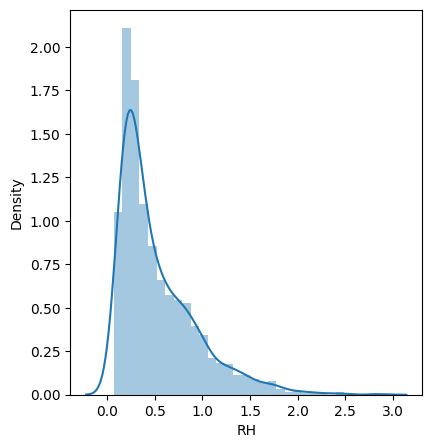

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["RH"])

In [36]:
#Finding IQR
percentile25=df1["RH"].quantile(0.25)
percentile75=df1["RH"].quantile(0.75)


In [37]:
percentile25

0.23

In [38]:
percentile75

0.73

In [39]:
iqr=percentile75-percentile25
iqr

0.5

In [40]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [41]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 1.48
lower_limit -0.52


In [42]:
df1[df1["RH"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
32,1.54,260.94,365.00,756.10,0.00,15.27,0.00,0.0,160.0
65,1.76,99.26,193.09,753.12,0.00,22.83,0.00,0.0,145.0
87,2.41,266.38,251.10,753.00,0.00,26.26,0.00,0.0,211.0
88,2.18,270.22,8.17,753.00,0.00,23.44,0.00,0.0,78.0
92,1.68,261.43,260.92,753.00,0.00,27.55,0.00,0.0,175.0
114,1.92,79.94,198.64,753.00,0.38,26.03,0.00,0.0,214.0
117,1.67,79.79,164.04,753.00,0.00,25.09,0.00,0.0,249.0
129,1.53,80.56,164.04,753.00,1.01,29.88,0.00,0.0,206.0
139,1.73,84.43,134.20,754.00,1.07,29.27,0.00,0.0,188.0
141,1.85,89.47,254.45,753.00,0.13,29.36,0.00,0.0,167.0


In [43]:
df1[df1["RH"]<lower_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


<Axes: >

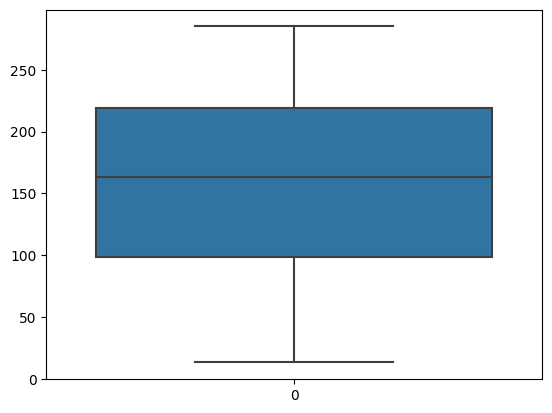

In [44]:
sns.boxplot(df1["WS"])

C:\Users\acer\AppData\Local\Temp\ipykernel_6236\3863579608.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["WS"])


<Axes: xlabel='WS', ylabel='Density'>

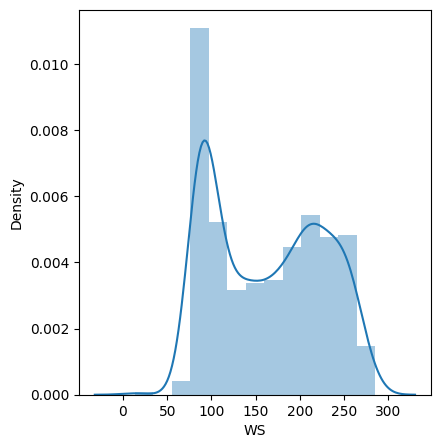

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["WS"])

In [46]:
#Finding IQR
percentile25=df1["WS"].quantile(0.25)
percentile75=df1["WS"].quantile(0.75)

In [47]:
iqr=percentile75-percentile25
iqr

120.4425

In [48]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [49]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 399.73375
lower_limit -82.03625


In [50]:
df1[df1["WS"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


In [51]:
df1[df1["WS"]<lower_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


<Axes: >

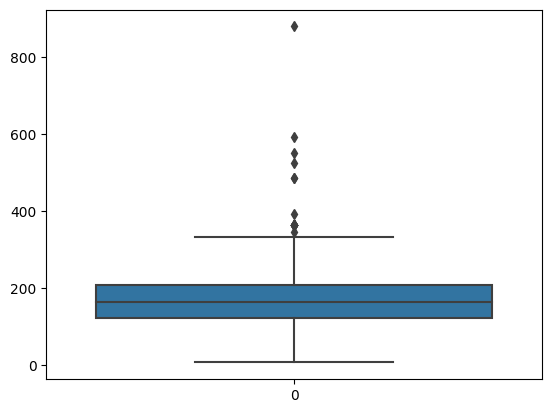

In [52]:
sns.boxplot(df1["WD"])

C:\Users\acer\AppData\Local\Temp\ipykernel_6236\650313137.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["WD"])


<Axes: xlabel='WD', ylabel='Density'>

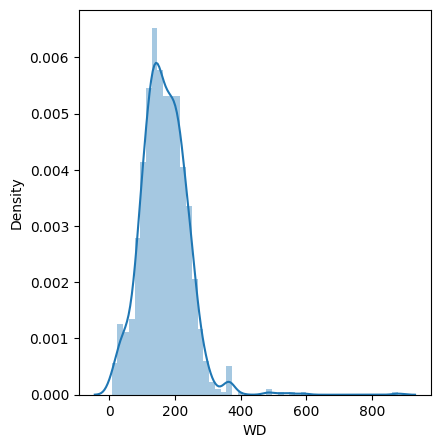

In [53]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["WD"])

In [54]:
#Finding IQR
percentile25=df1["WD"].quantile(0.25)
percentile75=df1["WD"].quantile(0.75)

In [55]:
iqr=percentile75-percentile25
iqr

85.83

In [56]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [57]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 338.6925
lower_limit -4.627500000000012


In [58]:
df1[df1["WD"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
31,1.04,261.18,365.00,756.10,0.00,17.59,0.00,0.0,107.0
32,1.54,260.94,365.00,756.10,0.00,15.27,0.00,0.0,160.0
33,0.59,200.75,365.00,756.10,0.00,13.98,0.00,0.0,188.0
34,0.25,156.84,365.00,756.10,0.00,14.66,0.00,0.0,291.0
35,0.89,234.41,365.00,756.10,0.00,15.85,0.00,0.0,254.0
36,0.58,239.69,365.00,756.10,0.00,15.36,0.00,0.0,247.0
37,0.33,185.65,365.00,756.10,0.00,15.09,0.00,0.0,246.0
38,0.74,225.88,365.00,756.10,0.00,16.29,0.00,0.0,265.0
39,0.72,223.44,365.00,756.10,0.87,14.63,0.00,0.0,228.0
40,0.78,242.39,365.00,756.10,9.13,16.00,0.00,0.0,239.0


In [59]:
df1[df1["WD"]<lower_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


<Axes: >

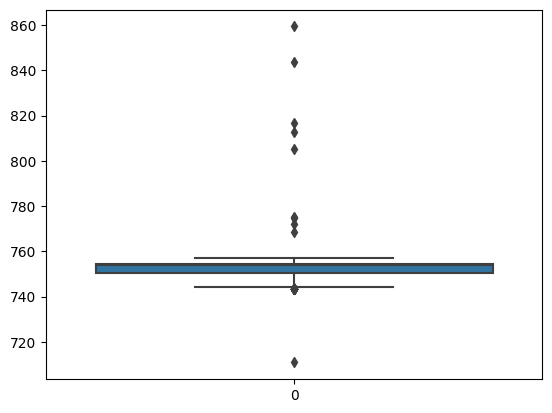

In [60]:
sns.boxplot(df1["SR"])

C:\Users\acer\AppData\Local\Temp\ipykernel_6236\831052673.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SR"])


<Axes: xlabel='SR', ylabel='Density'>

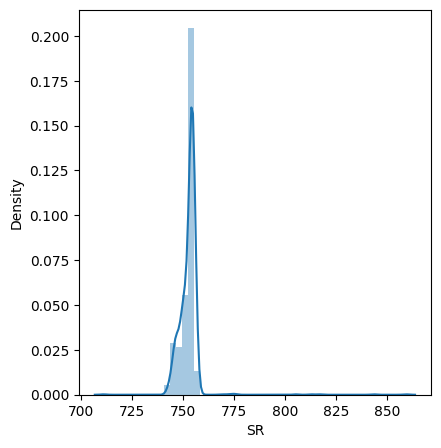

In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["SR"])

In [62]:
#Finding IQR
percentile25=df1["SR"].quantile(0.25)
percentile75=df1["SR"].quantile(0.75)

In [63]:
iqr=percentile75-percentile25
iqr

4.1299999999999955

In [64]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [65]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 760.7149999999999
lower_limit 744.1949999999999


In [66]:
df1[df1["SR"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
151,0.44,154.77,228.23,772.28,0.00,29.37,0.15,14.0,72.0
203,0.17,137.51,142.92,775.10,1.66,29.73,0.00,0.0,60.0
204,0.40,204.97,151.59,843.48,0.74,29.74,0.00,0.0,59.0
205,0.31,174.79,176.99,805.32,0.57,30.54,0.00,0.0,46.0
255,1.18,89.26,79.88,812.65,1.14,27.12,0.00,0.0,22.0
256,1.09,90.61,132.81,768.64,1.14,27.29,0.00,0.0,29.0
557,0.39,242.33,191.91,816.79,0.44,30.46,0.00,0.0,43.0
558,0.29,219.84,65.91,859.37,0.97,28.37,0.14,13.4,56.0
675,0.22,202.91,95.66,774.83,0.43,19.57,0.00,0.0,405.0


In [67]:
[df1["SR"]<lower_limit]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1259    False
 1260    False
 1261    False
 1262    False
 1263    False
 Name: SR, Length: 1264, dtype: bool]

<Axes: >

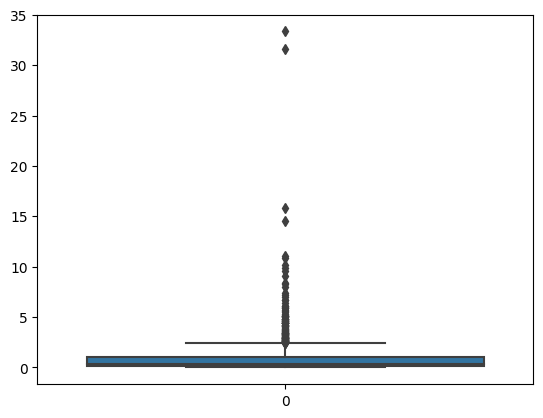

In [68]:
sns.boxplot(df1["BP"])

C:\Users\acer\AppData\Local\Temp\ipykernel_6236\1790257710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["BP"])


<Axes: xlabel='BP', ylabel='Density'>

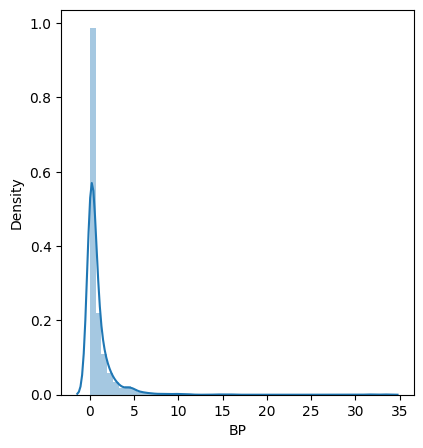

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["BP"])

In [70]:
#Finding IQR
percentile25=df1["BP"].quantile(0.25)
percentile75=df1["BP"].quantile(0.75)

In [71]:
iqr=percentile75-percentile25
iqr

0.92

In [72]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [73]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 2.42
lower_limit -1.2600000000000002


In [74]:
df1[df1["BP"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
0,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0,377.0
1,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0,373.0
2,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0,322.0
3,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0,149.0
4,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0,160.0
...,...,...,...,...,...,...,...,...,...
421,0.71,222.80,152.85,750.84,2.48,27.32,0.0,0.0,344.0
425,0.42,207.81,197.75,750.99,2.47,28.58,0.0,0.0,309.0
781,0.33,211.82,208.92,754.50,6.11,27.40,0.0,0.0,158.0
782,0.25,152.69,195.40,754.44,5.17,28.44,0.0,0.0,162.0


In [75]:
df1[df1["BP"]<lower_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


<Axes: >

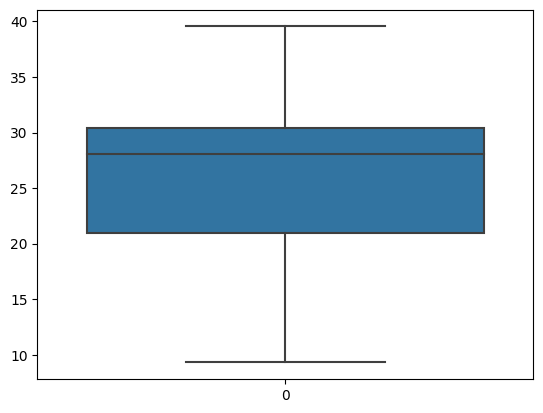

In [76]:
sns.boxplot(df1["AT"])

C:\Users\acer\AppData\Local\Temp\ipykernel_6236\916772993.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["AT"])


<Axes: xlabel='AT', ylabel='Density'>

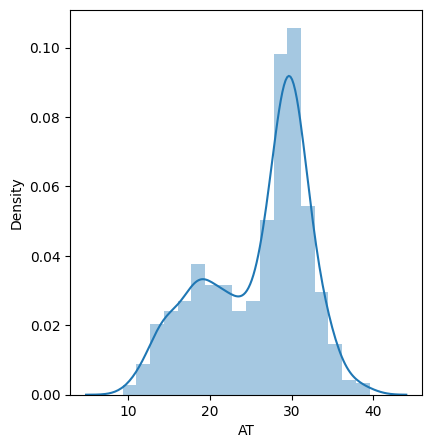

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["AT"])

In [78]:
#Finding IQR
percentile25=df1["AT"].quantile(0.25)
percentile75=df1["AT"].quantile(0.75)

In [79]:
iqr=percentile75-percentile25
iqr

9.472499999999997

In [80]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [81]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 44.60874999999999
lower_limit 6.718750000000007


In [82]:
df1[df1["AT"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


In [83]:
df1[df1["AT"]<lower_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


<Axes: >

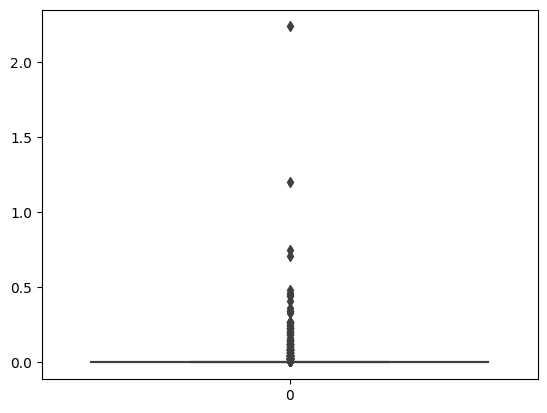

In [84]:
sns.boxplot(df1["RF"])

C:\Users\acer\AppData\Local\Temp\ipykernel_6236\1538054063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["RF"])


<Axes: xlabel='RF', ylabel='Density'>

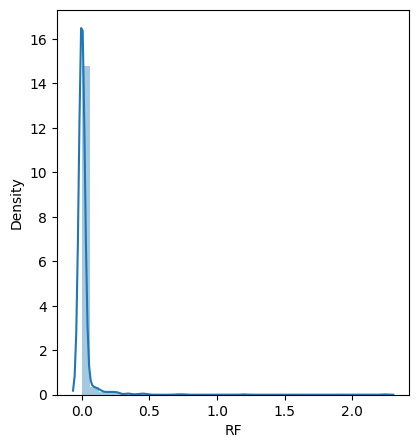

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["RF"])

In [86]:
#Finding IQR
percentile25=df1["RF"].quantile(0.25)
percentile75=df1["RF"].quantile(0.75)

In [87]:
iqr=percentile75-percentile25
iqr

0.0

In [88]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [89]:
print("upper limit",upper_limit)
print("lower_limit",lower_limit)

upper limit 0.0
lower_limit 0.0


In [90]:
df1[df1["RF"]>upper_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI
151,0.44,154.77,228.23,772.28,0.00,29.37,0.15,14.0,72.0
226,0.51,251.62,191.15,751.10,0.50,29.16,0.01,0.8,94.0
266,0.20,144.27,118.67,746.13,3.07,27.39,0.07,6.6,84.0
268,0.31,200.87,97.18,746.00,1.65,27.47,0.05,4.4,72.0
277,0.21,93.07,159.21,746.34,4.39,29.03,0.06,5.4,133.0
...,...,...,...,...,...,...,...,...,...
1248,0.78,92.85,67.15,753.95,0.15,22.60,2.24,111.8,37.0
1250,1.05,101.01,200.51,754.51,0.20,29.11,0.04,3.8,87.0
1257,0.33,89.98,109.02,754.16,0.02,28.61,0.05,4.2,82.0
1258,0.55,87.86,212.37,754.58,0.02,29.61,0.36,34.0,66.0


In [91]:
df1[df1["RF"]<lower_limit]

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI


<Axes: >

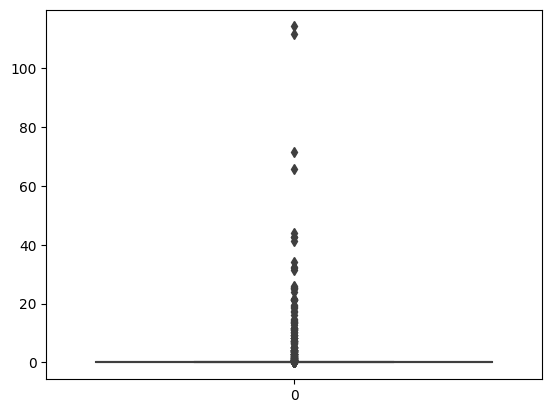

In [92]:
sns.boxplot(df1["TOT-RF"])

<Axes: >

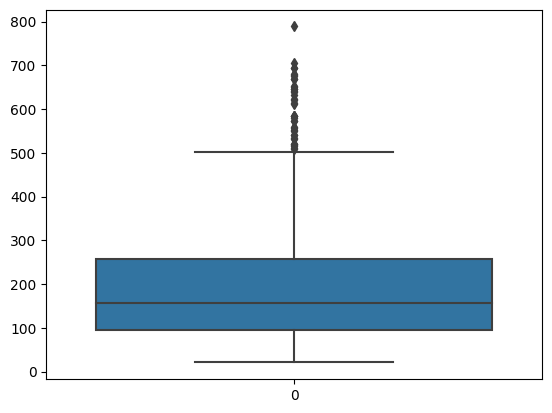

In [93]:
sns.boxplot(df1["AQI"])

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


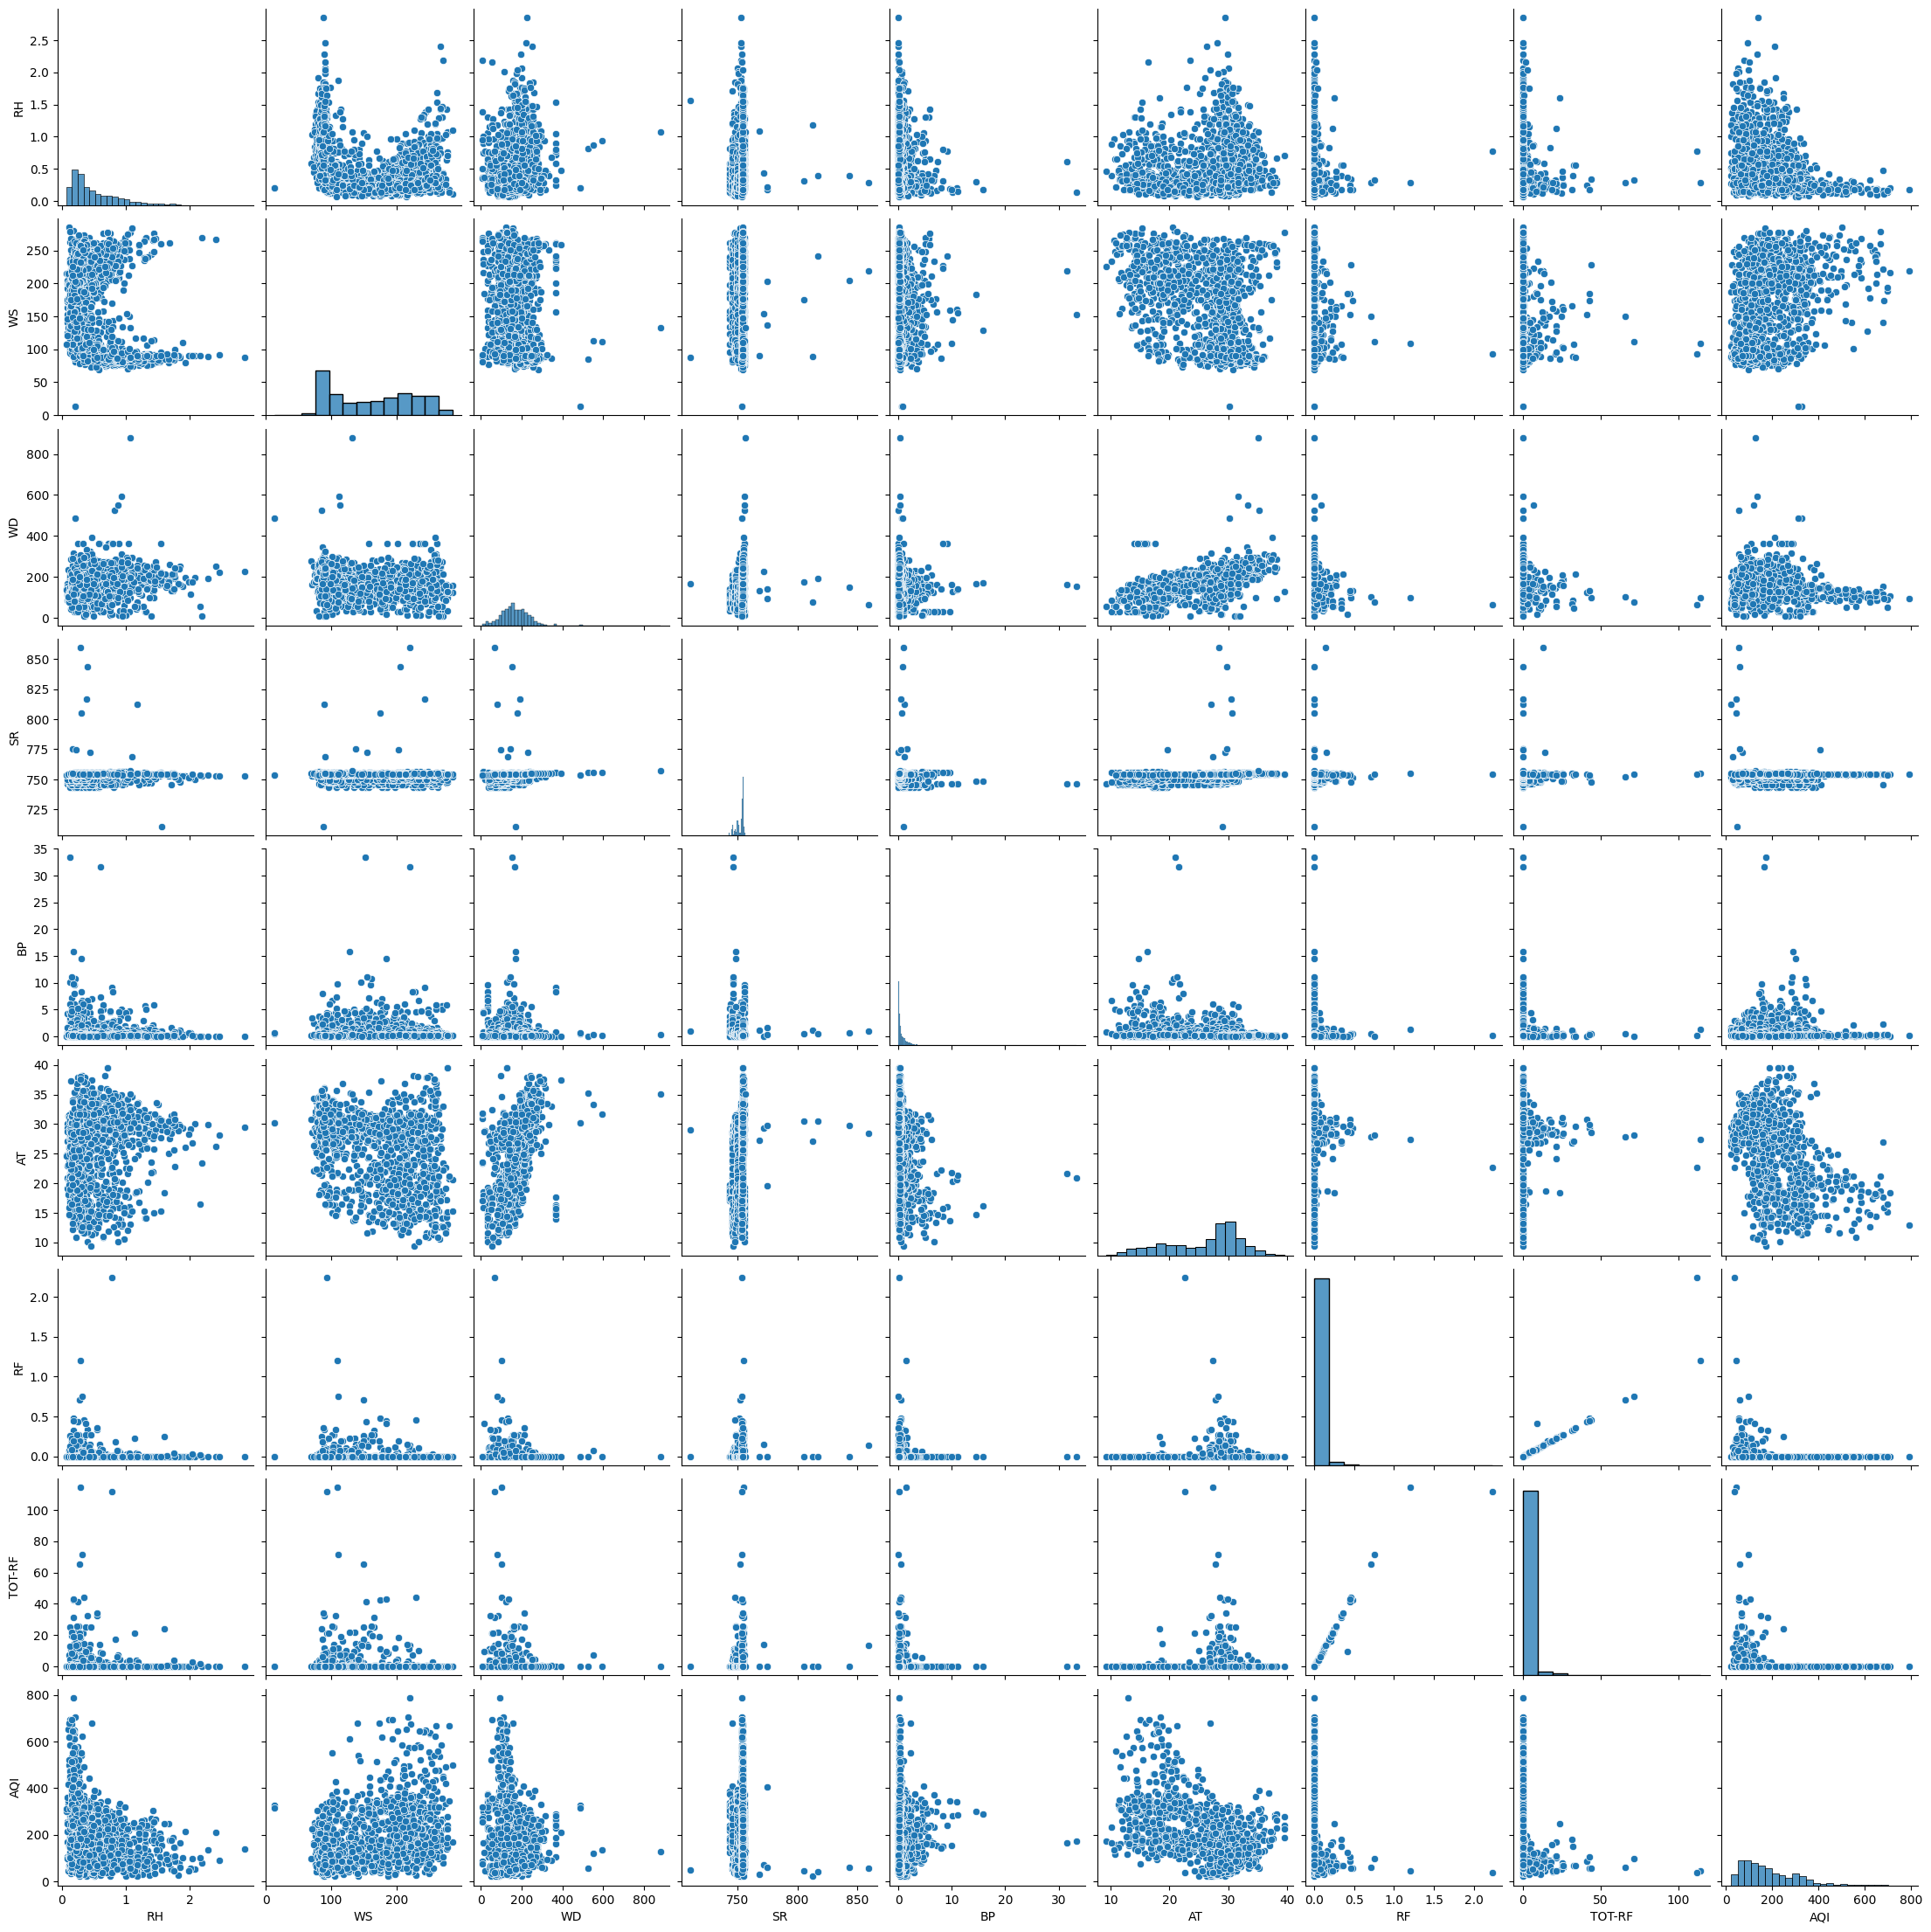

In [94]:
sns.pairplot(df1)

In [95]:
#!pip install scikit-learn scipy matplotlib numpy

In [96]:
x=df1.drop("AQI",axis=1)
y=df1["AQI"]

# train_test_split

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [98]:
X_train.shape,Y_test.shape

((1011, 8), (253,))

In [99]:
df1.isnull().sum()

RH        0
WS        0
WD        0
SR        0
BP        0
AT        0
RF        0
TOT-RF    0
AQI       0
dtype: int64

In [100]:
X_train.corr()

,RH,WS,WD,SR,BP,AT,RF,TOT-RF
RH,1.000000,-0.286986,0.195614,0.071362,-0.104138,0.129454,-0.034951,-0.056792
WS,-0.286986,1.000000,-0.113102,-0.006248,0.023817,-0.391304,-0.075790,-0.089501
WD,0.195614,-0.113102,1.000000,0.156665,-0.121007,0.487462,-0.114470,-0.126067
SR,0.071362,-0.006248,0.156665,1.000000,-0.169563,0.171822,0.046313,0.059422
BP,-0.104138,0.023817,-0.121007,-0.169563,1.000000,-0.206124,-0.045997,-0.055238
AT,0.129454,-0.391304,0.487462,0.171822,-0.206124,1.000000,0.035191,0.055699
RF,-0.034951,-0.075790,-0.114470,0.046313,-0.045997,0.035191,1.000000,0.946335
TOT-RF,-0.056792,-0.089501,-0.126067,0.059422,-0.055238,0.055699,0.946335,1.000000


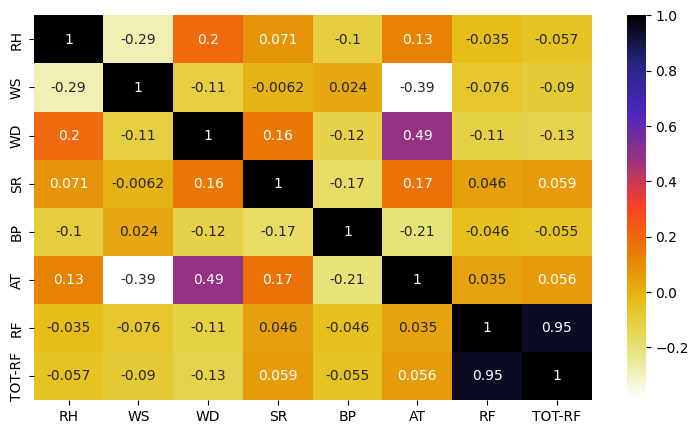

In [101]:
#using pearson correlation
plt.figure(figsize=(9,5))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [102]:
#this correlation checking will only be done on x_train not on x_test to avoid over-fitting

In [103]:
X_train.drop("TOT-RF",axis=1)
X_test.drop("TOT-RF",axis=1)

,RH,WS,WD,SR,BP,AT,RF
1163,0.26,232.29,220.57,754.51,0.22,28.58,0.00
299,0.13,145.46,129.37,746.22,10.14,20.35,0.00
747,0.79,81.89,147.03,754.26,0.26,18.11,0.00
5,0.47,176.74,32.17,755.61,6.96,13.30,0.00
1165,0.16,219.19,212.35,754.50,0.09,31.33,0.00
...,...,...,...,...,...,...,...
140,0.80,143.11,142.37,753.57,1.10,27.61,0.00
990,0.24,161.29,160.58,754.23,0.24,28.46,0.27
436,0.51,216.50,230.53,755.01,1.33,29.12,0.00
726,1.03,274.53,85.19,751.43,0.10,12.06,0.00


# Standardization

In [104]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [105]:
X_train=scaler.fit_transform(X_train)

In [106]:
X_train

array([[ 1.22890458,  1.5680162 ,  2.76060858, ..., -1.33258689,
        -0.15408112, -0.19457972],
       [-0.52837754, -0.38163542,  0.01986489, ..., -0.20054001,
        -0.15408112, -0.19457972],
       [ 1.13261515, -1.18689859,  0.18948655, ..., -0.35137374,
        -0.15408112, -0.19457972],
       ...,
       [ 0.45858913, -1.24171959,  1.46747141, ...,  1.52849094,
        -0.15408112, -0.19457972],
       [-0.81724583,  0.15892517, -0.58664829, ...,  0.68064656,
        -0.15408112, -0.19457972],
       [-0.33579868,  0.86442687, -0.243196  , ..., -0.79117317,
        -0.15408112, -0.19457972]])

In [107]:
X_test=scaler.transform(X_test)

# Linear Regression

In [108]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

In [109]:
model.fit(X_train,Y_train)

LinearRegression()

In [110]:
#predecting train
train_pred=model.predict(X_train)
#Predecting on test
test_pred=model.predict(X_test)

In [111]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))

print("Rsquared value on train:",model.score(X_train,Y_train))
print("Rsquared value on test:",model.score(X_test,Y_test))

RMSE TrainingData= 99.5416909478382
RMSE TestData= 99.0413508954115
Rsquared value on train: 0.38600315767721116
Rsquared value on test: 0.3815566807380648


In [112]:
#sns.distplot(test_pred-Y_test)

In [113]:
z=pd.DataFrame({"actual":Y_test, "predicted":test_pred})
z.head()

,actual,predicted
1163,165.0,219.345559
299,283.0,203.548900
747,176.0,231.963251
5,299.0,287.578892
1165,183.0,195.488800


# Decision Tree Regressor

In [114]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [115]:
#predicting train
train_preds=DT.predict(X_train)
#predecting on test
test_preds=DT.predict(X_test)

In [116]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))

print("Rsquared value on train:",DT.score(X_train,Y_train))
print("Rsquared value on test:",DT.score(X_test,Y_test))

RMSE TrainingData= 0.0
RMSE TestData= 81.82034691909142
Rsquared value on train: 1.0
Rsquared value on test: 0.577925198557024


In [117]:
param_dist={"criterion":['absolute_error','squared_error'],"max_depth":[2,10,12,15,20,25,30,50,60,90,100,None],
            "min_samples_leaf":[4,6,8,10,12,15,20,25,30,35,40,50,60,80,100]}

In [118]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(DT,param_grid=param_dist,cv=5,n_jobs=1)

In [119]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'max_depth': [2, 10, 12, 15, 20, 25, 30, 50, 60, 90,
                                       100, None],
                         'min_samples_leaf': [4, 6, 8, 10, 12, 15, 20, 25, 30,
                                              35, 40, 50, 60, 80, 100]})

In [120]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=12, min_samples_leaf=12)

In [121]:
grid.best_score_

0.6552636366256834

In [122]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 12, 'min_samples_leaf': 12}

# Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor().fit(X_train,Y_train)

In [124]:
#predecting train
train_preds1=RF.predict(X_train)
#predecting on test
test_preds1=RF.predict(X_test)

In [125]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))

print("Rsquared value on train:",RF.score(X_train,Y_train))
print("Rsquared value on test:",RF.score(X_test,Y_test))

RMSE TrainingData= 22.035343943093004
RMSE TestData= 59.508997526099066
Rsquared value on train: 0.9699118298041184
Rsquared value on test: 0.7767291322433891


# Grid search cv

In [126]:
#numbers of trees in random forest
n_estimators=[20,30,40,60,80,100,150,300]

#number of features to be considered at every split
max_features=[0.1,0.2,0.3,0.5,0.60,1]

#max numbers of levels in trees
max_depth=[5,10,20,30,50,90,150,200,300]

#numbert of samples

max_samples=[0.2,0.5,0.60,0.80,1.0]

In [127]:
param_grid={"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,"max_samples":max_samples}
print(param_grid)

{'n_estimators': [20, 30, 40, 60, 80, 100, 150, 300], 'max_features': [0.1, 0.2, 0.3, 0.5, 0.6, 1], 'max_depth': [5, 10, 20, 30, 50, 90, 150, 200, 300], 'max_samples': [0.2, 0.5, 0.6, 0.8, 1.0]}


In [128]:
rf_grid=GridSearchCV(estimator=RF,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)

In [129]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 50, 90, 150, 200, 300],
                         'max_features': [0.1, 0.2, 0.3, 0.5, 0.6, 1],
                         'max_samples': [0.2, 0.5, 0.6, 0.8, 1.0],
                         'n_estimators': [20, 30, 40, 60, 80, 100, 150, 300]},
             verbose=2)

In [130]:
rf_grid.best_params_

{'max_depth': 300,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 150}

In [131]:
rf_grid.best_score_

0.7753439711083423

# Support Vector Regression

In [132]:
from sklearn.svm import SVR
#support vector regression

In [133]:
#creating and fitting SVR model
svr=SVR().fit(X_train,Y_train)

In [134]:
#predecting train
train_pred2=svr.predict(X_train)
#predecting on test
test_pred2=svr.predict(X_test)

In [135]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred2)))
print("RMSE TrainingData=",str(RMSE_train))
print("RMSE TestData=",str(RMSE_test))

print("Rsquared value on train:",RF.score(X_train,Y_train))
print("Rsquared value on test:",RF.score(X_test,Y_test))

RMSE TrainingData= 110.6116164389028
RMSE TestData= 108.0681137713634
Rsquared value on train: 0.9699118298041184
Rsquared value on test: 0.7767291322433891


In [136]:
parameters={"kernel":["rbf","sigmoid","poly"],"C":[0.1,1],'gamma': [ 0.1, 0.01]}

In [137]:
r_svr=GridSearchCV(estimator=svr,param_grid=parameters,cv=5)
r_svr.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'sigmoid', 'poly']})

In [138]:
rf_grid.best_params_

{'max_depth': 300,
 'max_features': 0.6,
 'max_samples': 1.0,
 'n_estimators': 150}

In [139]:
rf_grid.best_score_

0.7753439711083423

# Calculating AQI Bucket

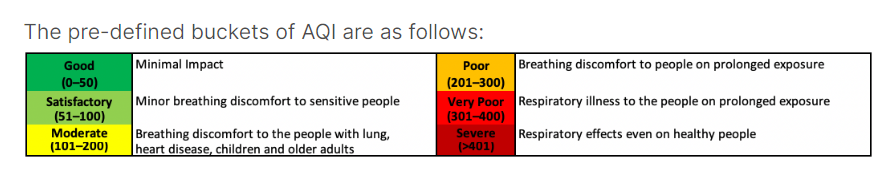

In [140]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

In [141]:
df1["AQI_bucket_calculated"] = df1["AQI"].apply(lambda x: get_AQI_bucket(x))

In [142]:
df1.head()

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI,AQI_bucket_calculated
0,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0,377.0,Very Poor
1,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0,373.0,Very Poor
2,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0,322.0,Very Poor
3,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0,149.0,Moderate
4,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0,160.0,Moderate


In [143]:
df1.isnull().sum()

RH                       0
WS                       0
WD                       0
SR                       0
BP                       0
AT                       0
RF                       0
TOT-RF                   0
AQI                      0
AQI_bucket_calculated    0
dtype: int64

Text(0, 0.5, 'no of categories')

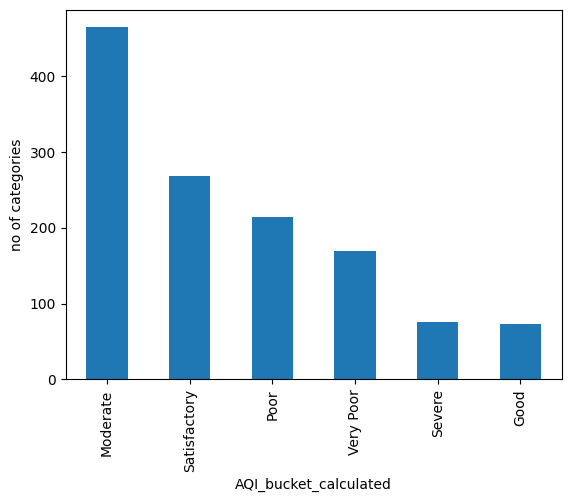

In [144]:
df1["AQI_bucket_calculated"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("AQI_bucket_calculated")
plt.ylabel("no of categories")

# Classification Algorithm

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression

In [146]:
# Label Encoder

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
label_encoder=LabelEncoder()

In [149]:
df1["class"]=label_encoder.fit_transform(df1["AQI_bucket_calculated"])

In [150]:
df1.head()

,RH,WS,WD,SR,BP,AT,RF,TOT-RF,AQI,AQI_bucket_calculated,class
0,0.31,200.89,32.54,755.61,3.10,14.28,0.0,0.0,377.0,Very Poor,5
1,0.32,100.85,32.51,755.62,6.71,15.00,0.0,0.0,373.0,Very Poor,5
2,0.47,104.60,33.03,755.62,2.51,16.39,0.0,0.0,322.0,Very Poor,5
3,0.31,227.85,32.87,755.62,8.38,14.36,0.0,0.0,149.0,Moderate,1
4,1.30,269.00,32.17,755.61,5.67,14.05,0.0,0.0,160.0,Moderate,1


In [151]:
df1["class"].unique()

array([5, 1, 2, 3, 0, 4])

In [152]:
df1["AQI_bucket_calculated"].unique()

array(['Very Poor', 'Moderate', 'Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [153]:
x2=df1.drop(["AQI","AQI_bucket_calculated","class","TOT-RF"],axis=1)
y2=df1["class"]

In [154]:
x2.head()

,RH,WS,WD,SR,BP,AT,RF
0,0.31,200.89,32.54,755.61,3.10,14.28,0.0
1,0.32,100.85,32.51,755.62,6.71,15.00,0.0
2,0.47,104.60,33.03,755.62,2.51,16.39,0.0
3,0.31,227.85,32.87,755.62,8.38,14.36,0.0
4,1.30,269.00,32.17,755.61,5.67,14.05,0.0


# Train Test Split

In [155]:
X_train2,X_test2,Y_train2,Y_test2=train_test_split(x2,y2,test_size=0.2,random_state=70)
#splitting thedata inti training and testing data

In [156]:
#fit the modelon train data
log_reg=LogisticRegression().fit(X_train2,Y_train2)

#predict on train
train_preds2=log_reg.predict(X_train2)
#accuracy on train
from sklearn.metrics import accuracy_score,confusion_matrix

print("model accuracy on train is:",accuracy_score(Y_train2,train_preds2))

#predict on test
test_preds2=log_reg.predict(X_test2)
#accuracy on test
print("model accuracy on test is:",accuracy_score(Y_test2,test_preds2))


model accuracy on train is: 0.3847675568743818
model accuracy on test is: 0.391304347826087


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision tree classifier

In [157]:
#fit the model on train data
DT2=DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3=DT2.predict(X_train2)
#accuracy on train
print("model accuracy on train is:",accuracy_score(Y_train2,train_preds3))

#predict on test
test_preds3=DT2.predict(X_test2)
#accuracy on test
print("model accuracy on test is:",accuracy_score(Y_test2,test_preds3))


model accuracy on train is: 1.0
model accuracy on test is: 0.541501976284585


In [158]:
param_dist2={"criterion":['gini','entropy'],"max_depth":[5,10,15,20,30,50,100,150,200,None],
            "min_samples_leaf":[2,5,10,12,15,30,40,50,100,200]}

In [159]:
grid2=GridSearchCV(DT2,param_grid=param_dist2,cv=5,n_jobs=1)

In [160]:
grid2.fit(X_train2,Y_train2)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 30, 50, 100, 150, 200,
                                       None],
                         'min_samples_leaf': [2, 5, 10, 12, 15, 30, 40, 50, 100,
                                              200]})

In [161]:
grid2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)

In [162]:
grid2.best_score_

0.5608301224211092

In [163]:
grid2.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10}

# Random Forest Classifier

In [164]:
#fit model on train data
RF2=RandomForestClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds4=RF2.predict(X_train2)
#accuracy on train

print("model accuracy on train is:",accuracy_score(Y_train2,train_preds4))

#predict on test
test_preds4=RF2.predict(X_test2)
#accuracy on test
print("model accuracy on test is:",accuracy_score(Y_test2,test_preds4))


model accuracy on train is: 1.0
model accuracy on test is: 0.6007905138339921


In [165]:
from sklearn.metrics import classification_report
print(classification_report(Y_test2,test_preds4))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        15
           1       0.60      0.66      0.63        92
           2       0.52      0.42      0.46        36
           3       0.59      0.63      0.61        60
           4       1.00      0.71      0.83        17
           5       0.53      0.64      0.58        33

    accuracy                           0.60       253
   macro avg       0.66      0.56      0.59       253
weighted avg       0.61      0.60      0.60       253



In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test2,test_preds4)

array([[ 5,  1,  0,  9,  0,  0],
       [ 0, 61,  8, 16,  0,  7],
       [ 0, 13, 15,  1,  0,  7],
       [ 2, 18,  2, 38,  0,  0],
       [ 0,  0,  0,  0, 12,  5],
       [ 0,  8,  4,  0,  0, 21]], dtype=int64)

In [167]:
#numbers of trees in random forest
n_estimators1=[20,30,40,50,100,150,200,300,None]

#number of features to be considered at every split
max_features1=[0.1,0.2,0.4,0.6,0.8,1]

#max numbers of levels in trees
max_depth1=[10,20,50,60,80,90,100,200]

#numbert of samples

max_samples1=[0.5,0.60,0.80,0.9,1.0]

In [168]:
param_grid1={"n_estimators":n_estimators1,"max_features":max_features1,"max_depth":max_depth1,"max_samples":max_samples1}
print(param_grid1)

{'n_estimators': [20, 30, 40, 50, 100, 150, 200, 300, None], 'max_features': [0.1, 0.2, 0.4, 0.6, 0.8, 1], 'max_depth': [10, 20, 50, 60, 80, 90, 100, 200], 'max_samples': [0.5, 0.6, 0.8, 0.9, 1.0]}


In [169]:
rf_grid1=GridSearchCV(estimator=RF2,param_grid=param_grid1,cv=5,n_jobs=-1,verbose=2)

In [170]:
rf_grid1.fit(X_train2,Y_train2)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 50, 60, 80, 90, 100, 200],
                         'max_features': [0.1, 0.2, 0.4, 0.6, 0.8, 1],
                         'max_samples': [0.5, 0.6, 0.8, 0.9, 1.0],
                         'n_estimators': [20, 30, 40, 50, 100, 150, 200, 300,
                                          None]},
             verbose=2)

In [171]:
rf_grid1.best_params_

{'max_depth': 90, 'max_features': 0.1, 'max_samples': 0.9, 'n_estimators': 150}

In [172]:
rf_grid1.best_score_

0.6321026191289081

# K Nearest Neighbor

In [173]:
#fit the modelon train data

KNN=KNeighborsClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds5=KNN.predict(X_train2)
#accuracy on train
from sklearn.metrics import accuracy_score,confusion_matrix

print("model accuracy on train is:",accuracy_score(Y_train2,train_preds5))

#predict on test
test_preds5=KNN.predict(X_test2)
#accuracy on test
print("model accuracy on test is:",accuracy_score(Y_test2,test_preds5))


model accuracy on train is: 0.6172106824925816
model accuracy on test is: 0.40711462450592883
